<a href="https://colab.research.google.com/github/paulsoumyadip/ted_talk_views_prediction/blob/main/Ted_Talks_Views_Prediction_Regression_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*   # **PROJECT NAME : *TED TALKS VIEWS PREDICTION***
*** ***
*   # **PROJECT OBJECTIVE : *TO PREDICT THE VIEWS OF A VIDEO UPLOADED TO TEDx WEBSITE***









## **PROBLEM DESCRIPTION/ BUSINESS CONTEXT :-**

******
* *TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.*

* *Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.*

* *As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.*

* *The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.*

*****

**DATA USED** : *data_ted_talks.csv* - *provided by AlmaBetter*
******

### *Even though TED talks are quite popular these days but we would still like to give a small description*
##**What is TED Talks?**

*A **TED talk** is a **public speaking** event in the form of **recorded video** presentation which was originally aired at the main TED annual event. TED refers to Technology, Entertainment, Design. TED Conferences, LLC is an American-Canadian non-profit media organization that has the main ideology of finding and sharing knowledge of the experts from different fields amoung the community.*

*TED was founded by Richard Saul Wurman and Harry Marks in February 1984 as a tech conference. Till date more than 13000 TED event has been held in 150 countries by TED and its sister TEDx for free consumption by all sorts of people. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates are among the luminaries on its speaker roster.*


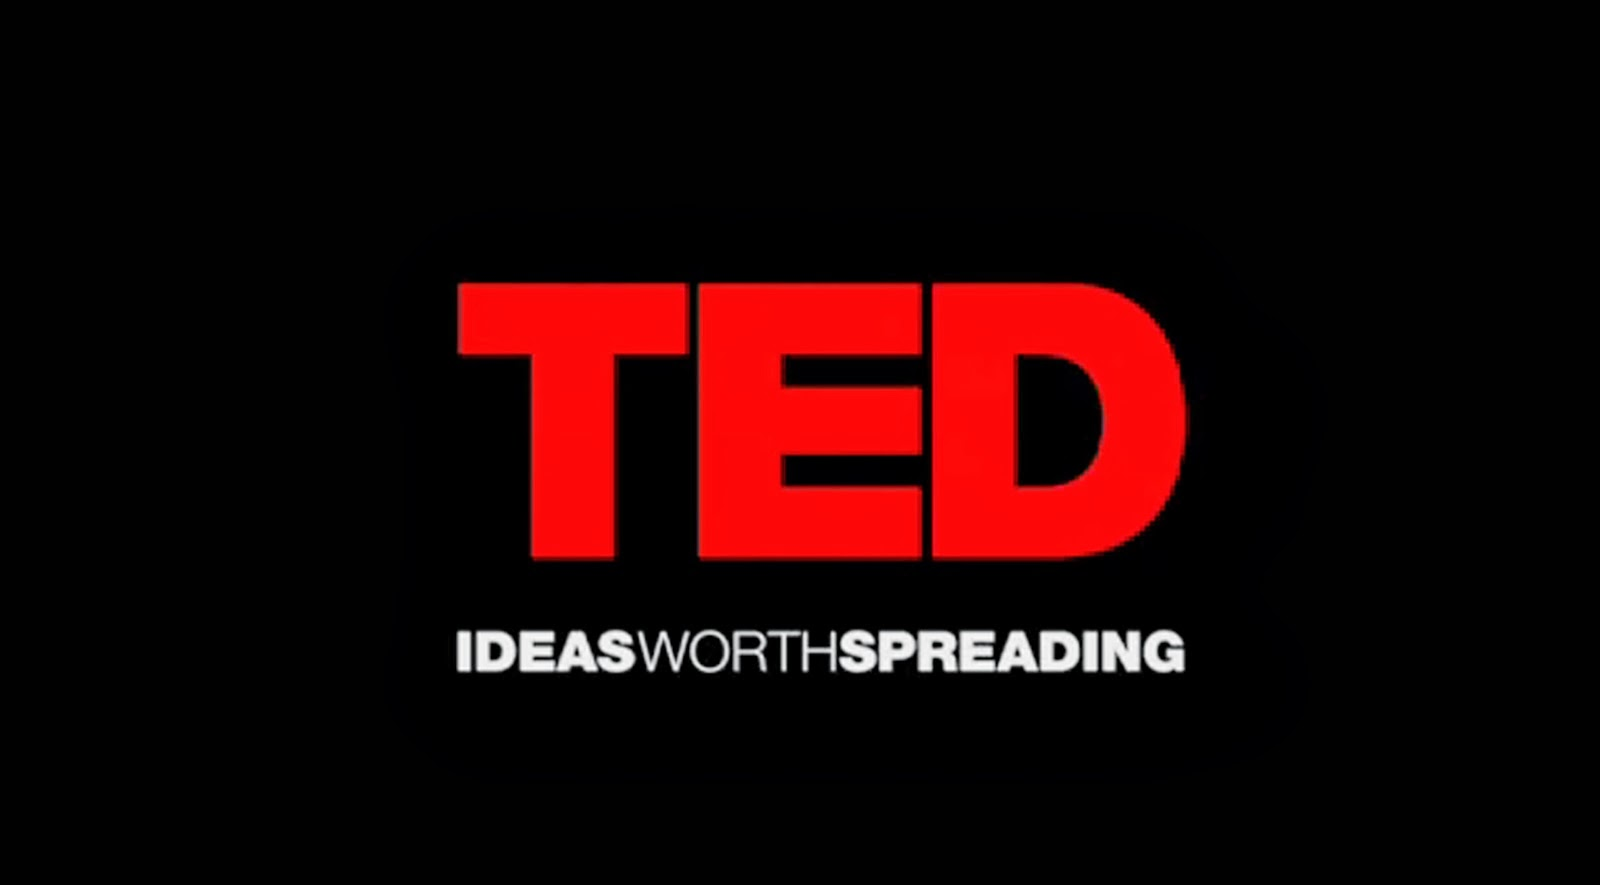


***The main goal is to create a prediction model using Supervised Regression so that it may be used to foretell how many people will watch a certain video that has been posted to TEDx website.***

##*So Let's Begin!*

# ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the regression models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [1]:
# importing data manuplation and data visualization libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ast
# importing necessary classes from sci-kit learn library for imputing null values.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing WordCloud class from wordcloud class for Data Analysis.

from wordcloud import WordCloud,ImageColorGenerator

# importing required classes for model selection.

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing various machine learning models.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# importing classes of sci-kit learn for checking multicollinearity and feature selection.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing model evaluation metrics.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# importing warnings library to avoid unnecessary warnings.

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the Dataset:
tedtalk_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Regression Capstone/Data Set for Ted Talks Views Prediction/data_ted_talks.csv")

In [3]:
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
#Checking the column names:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

*The views column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*





***The dataset contains features like:***


*   talk_id: Talk identification number provided by TED

*    title: Title of the talk

*     speaker_1: First speaker in TED's speaker list

*    all_speakers: Speakers in the talk

*    occupations: Occupations of the speakers

*    about_speakers: Blurb about each speaker

*    recorded_date: Date the talk was rcorded

*    published_date: Date the talk was published to TED.com

*    event: Event or medium in which the talk was given

*   native_lang: Language the talk was given in

*   available_lang: All available languages (lang_code) for a talk

*   comments: Count of comments

*   duration: Duration in seconds

*   topics: Related tags or topics for the talk

*   related_talks: Related talks (key='talk_id',value='title')

*   url: URL of the talk

*   description: Description of the talk

*   transcript: Full transcript of the talk

***And the target variable***

*  views : Count of views



###**Let's try to get the basic info of out Data set in an organized manner using a function:**

In [5]:
#function to get a summary of our Dataset
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Null/ Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Row'] = df.iloc[0].values
    summary['Second Row'] = df.iloc[1].values
    

    return summary

In [6]:
DataInfoAll(tedtalk_df)

Dataset Shape: (4005, 19)
---------------------------------------------------------------------------


,Name,dtypes,Null/ Missing,Uniques,First Row,Second Row
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


**We can clearly see that there are a few missing values in**


*   *occupations*
*   *about_speakers*
*   *comments*


 **and most of the feature variables are categorical.**
******


In [7]:
#NaN values in 'comment' can be converted to 0
tedtalk_df['comments'].fillna(0, inplace = True)
#Dropping the only NaN in 'recorded_date'
tedtalk_df = tedtalk_df.dropna(subset= ['recorded_date'])
#Dropping the NaN values in all_speakers column
tedtalk_df = tedtalk_df.dropna(subset= ['all_speakers'])
#Changing the NaN values of 'occupation' column to - Not available
tedtalk_df['occupations'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#Changing the NaN values of 'about_speakers' column to - Not available
tedtalk_df['about_speakers'].fillna(str({0:' Not available'}),inplace=True,axis=0)

In [8]:
tedtalk_df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


**We can se no that there are no NaN values left, now we can proceed to do other stuffs**
******
***Let's check for duplicate coloumns:***



In [9]:
tedtalk_df.duplicated().sum()

0

*There is no duplicate values, that's a good sign*

### **Categorizing Variable types:**
* data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] 


* data_numerical= data[['talk_id','views', 'duration']]


* data_target_variable(Y)  = data[['views']]

In [10]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
data_numerical= tedtalk_df[['views', 'duration','comments','talk_id']]

data_categorical= tedtalk_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']]


*Before we start with other columns let's change the the dates from object to Datetime format.*

In [12]:
tedtalk_df['recorded_date'] = pd.to_datetime(tedtalk_df['recorded_date'], format = '%Y-%m-%d')
tedtalk_df['published_date'] = pd.to_datetime(tedtalk_df['published_date'], format = '%Y-%m-%d')

In [13]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
tedtalk_df['published_month'] = pd.DatetimeIndex(tedtalk_df['published_date']).month
tedtalk_df['published_month'] = tedtalk_df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
tedtalk_df['published_day'] = pd.DatetimeIndex(tedtalk_df['published_date']).day

#Extracting year from published_date column
tedtalk_df['published_year'] = pd.DatetimeIndex(tedtalk_df['published_date']).year

#Extracting week day from published_date
tedtalk_df['dayofweek'] = tedtalk_df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
tedtalk_df['dayofweek_num']= tedtalk_df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
tedtalk_df['video_age_day'] = tedtalk_df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(tedtalk_df['published_date']))
tedtalk_df['video_age_day'] = tedtalk_df['video_age_day'].dt.days
tedtalk_df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


In [14]:
#Creating a daily average views section
tedtalk_df['avg_daily_views'] = tedtalk_df['views'] / tedtalk_df['video_age_day']
tedtalk_df.sample(8)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
806,1052,"Take ""the Other"" to lunch",Elizabeth Lesser,{0: 'Elizabeth Lesser'},{0: ['wellness specialist']},"{0: ""Elizabeth Lesser helps her readers and st...",1477805,2010-12-08,2011-01-13,TEDWomen 2010,...,https://www.ted.com/talks/elizabeth_lesser_tak...,There's an angry divisive tension in the air t...,"This room may appear to be holding 600 people,...",Jan,13,2011,Thursday,4,3396,435.160483
975,1229,Fighting a contagious cancer,Elizabeth Murchison,{0: 'Elizabeth Murchison'},{0: ['cancer researcher']},{0: 'Elizabeth Murchison studies a mysterious ...,554645,2011-07-14,2011-09-22,TEDGlobal 2011,...,https://www.ted.com/talks/elizabeth_murchison_...,What is killing the Tasmanian devil? A virulen...,"Everyone's familiar with cancer, but we don't ...",Sep,22,2011,Thursday,4,3144,176.413804
3267,24048,How many ways can you arrange a deck of cards?,Yannay Khaikin,{0: 'Yannay Khaikin'},{0: ' Not available'},{0: ' Not available'},1352380,2014-03-27,2019-03-01,TED-Ed,...,https://www.ted.com/talks/yannay_khaikin_how_m...,One deck. Fifty-two cards. How many arrangemen...,"Pick a card, any card. Actually, just pick up ...",Mar,1,2019,Friday,5,427,3167.166276
2780,15518,Why you should make useless things,Simone Giertz,{0: 'Simone Giertz'},"{0: ['inventor', 'robotics enthusiast']}",{0: 'Simone Giertz runs a YouTube channel abou...,3579080,2018-04-10,2018-05-09,TED2018,...,https://www.ted.com/talks/simone_giertz_why_yo...,"In this joyful, heartfelt talk featuring demos...",Hello. My name is Simone. You know how people ...,May,9,2018,Wednesday,3,723,4950.318119
3885,23786,Does stress cause pimples?,Claudia Aguirre,{0: 'Claudia Aguirre'},{0: ' Not available'},{0: ' Not available'},937460,2012-11-15,2020-02-13,TED-Ed,...,https://www.ted.com/talks/claudia_aguirre_does...,Which came first: the stress or the pimples? T...,She's only a few feet away. The closer he gets...,Feb,13,2020,Thursday,4,78,12018.717949
3746,52396,Why I draw with robots,Sougwen Chung,{0: 'Sougwen Chung'},"{0: ['artist', 'researcher']}",{0: 'Sougwen 愫君 Chung is an artist and researc...,190756,2019-09-24,2019-11-25,TED@BCG Mumbai,...,https://www.ted.com/talks/sougwen_chung_why_i_...,What happens when humans and robots make art t...,Many of us here use technology in our day-to-d...,Nov,25,2019,Monday,1,158,1207.316456
2013,2349,Why medicine often has dangerous side effects ...,Alyson McGregor,{0: 'Alyson McGregor'},"{0: [""women's health pioneer""]}","{0: ""Alyson McGregor studies women's health, e...",1612761,2014-09-20,2015-10-14,TEDxProvidence,...,https://www.ted.com/talks/alyson_mcgregor_why_...,You might not know this: Many of the medicines...,We all go to doctors. And we do so with trust ...,Oct,14,2015,Wednesday,3,1661,970.957857
2716,12066,How to tame your wandering mind,Amishi Jha,{0: 'Amishi Jha'},{0: ['neuroscientist']},{0: 'As a neuroscientist specializing in the b...,4361368,2017-03-17,2018-03-23,TEDxCoconutGrove,...,https://www.ted.com/talks/amishi_jha_how_to_ta...,Amishi Jha studies how we pay attention: the p...,Consider the following statement: human beings...,Mar,23,2018,Friday,5,770,5664.114286


**We can now see that the recorded_date and published_date columns are now in datetime format.**

# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION** 

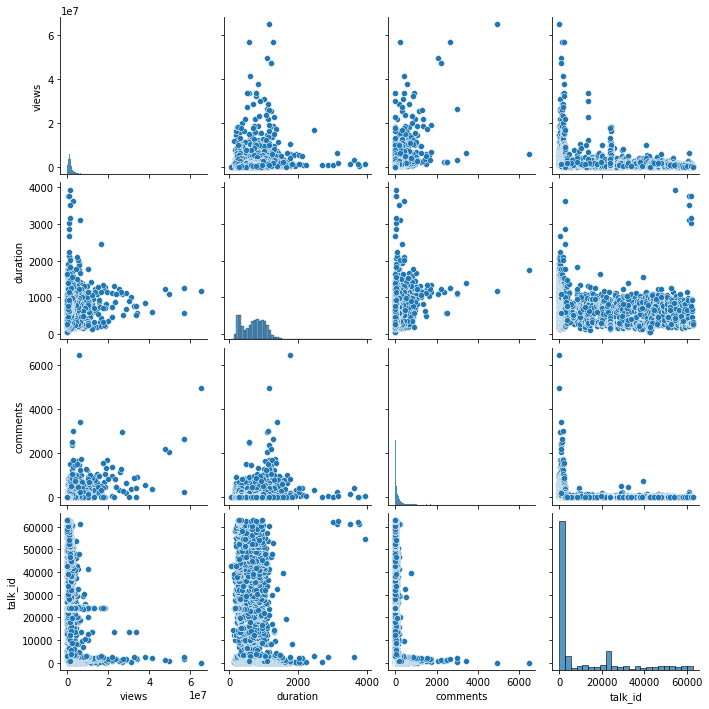

In [15]:
sns.pairplot(data_numerical)
plt.show()

**We can see that there are outliers in almost all numerical columns.**

**Let's find the speaker with the highest views:**

In [16]:
df_2 = tedtalk_df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)


Text(0.5, 1.0, 'Count')

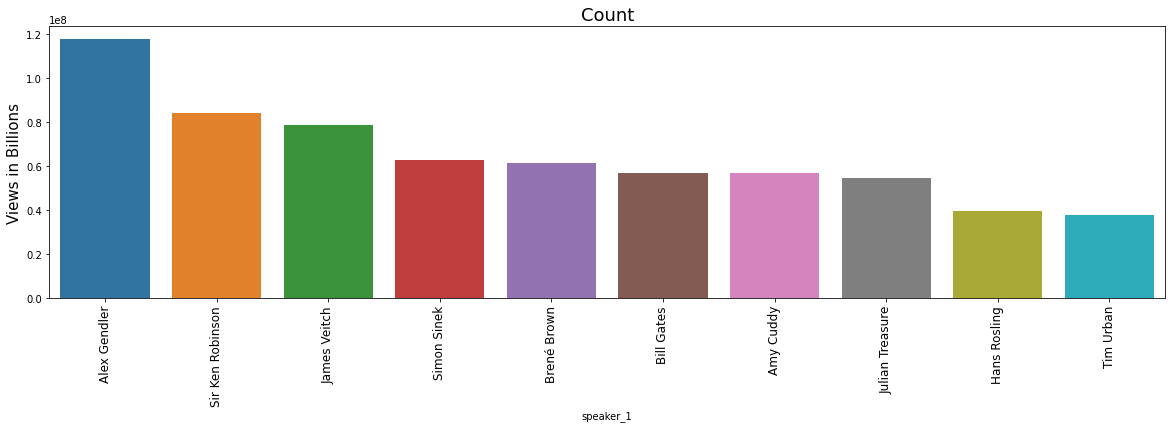

In [17]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

*Alex Gendler has highest views count followed by Sir Ken Robinson and james veitch*

In [18]:
pop_speaker=tedtalk_df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
tedtalk_df['speaker_1_avg_views']=tedtalk_df['speaker_1'].map(pop_speaker)
     

**Top five video with the highest views:**

In [19]:
df_1 = tedtalk_df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]] 


,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


*Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.*

*It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.*

*There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.*

**Most popular event in TED talks**

In [20]:
df_3 = tedtalk_df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)

Text(0.5, 1.0, 'Event')

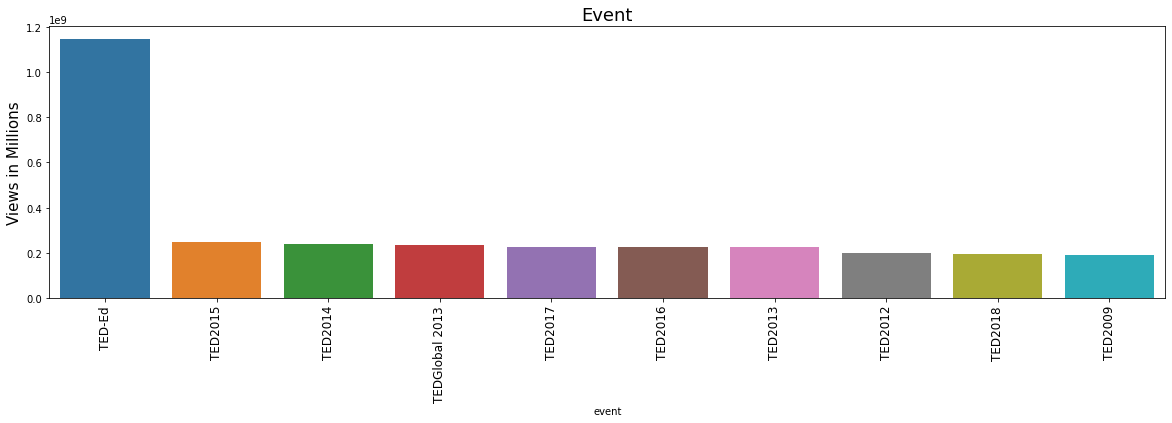

In [21]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Millions',fontsize = 15)
plt.title('Event',fontsize = 18)

Text(0.5, 1.0, 'Count')

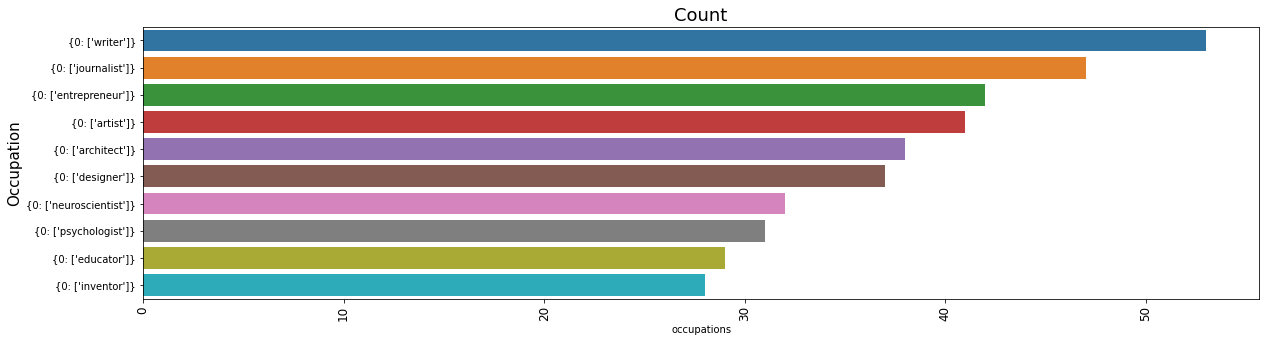

In [22]:
#Printing the top 15 most frequent speaker's occupations

plt.rcParams["figure.figsize"] = (15,4)

occ_df = tedtalk_df['occupations'].value_counts()[1:].head(10).reset_index()

plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

**Most of the speakers are writer followed by journalist and enterprenuer.**

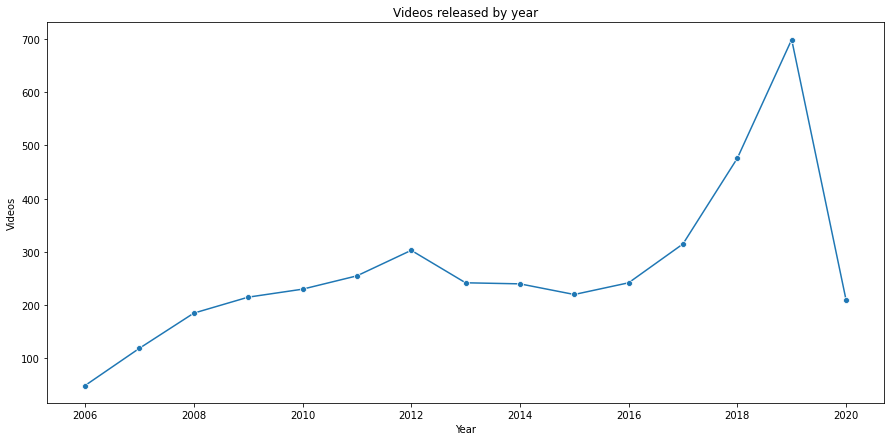

In [23]:
plt.figure(figsize=(15,7))
sns.lineplot(data=tedtalk_df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');

**The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic**

**Let's check during which days most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Day of The Week vs No.of Videos Uploaded')

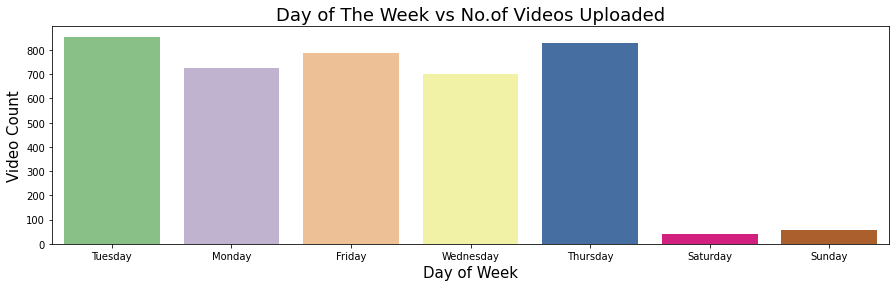

In [24]:
sns.countplot(data = tedtalk_df ,x='dayofweek',palette ='Accent')
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('Video Count',fontsize = 15)
plt.title('Day of The Week vs No.of Videos Uploaded',fontsize = 18)


Text(0.5, 1.0, 'Day of The Week vs Views in Millions')

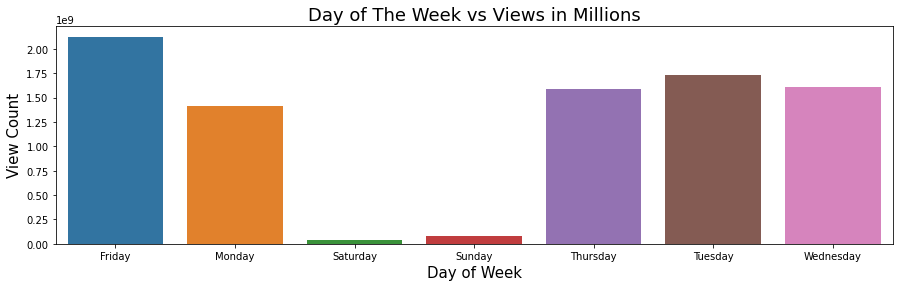

In [25]:
total_views = tedtalk_df.groupby('dayofweek')['views'].sum().reset_index()
sns.barplot(x='dayofweek',y='views' ,data =total_views)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('View Count',fontsize = 15)
plt.title('Day of The Week vs Views in Millions',fontsize = 18)

*  *From first bar graph we can clearly see that most of the TED talks are released in non-weekend days.*
*  *Most of the TED talks are released on Tuesday and Thursday followed by Friday.*
*  *Second graph shows that most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days.*

**Let's check during which month most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Month vs No. of videos')

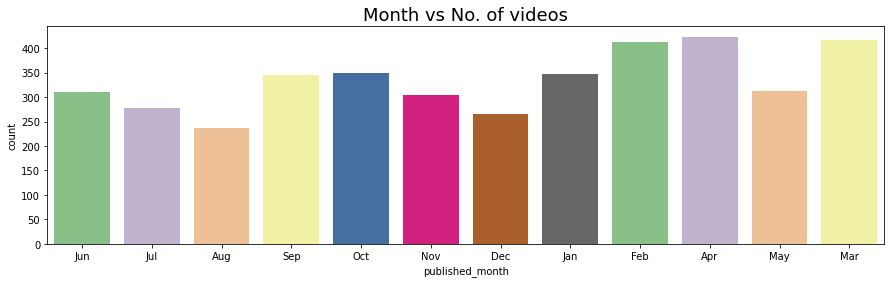

In [26]:
sns.countplot(data = tedtalk_df , x= 'published_month', palette ='Accent')
plt.title('Month vs No. of videos',fontsize = 18)

In [27]:
m_views = tedtalk_df.groupby('published_month')['views'].sum().reset_index()

Text(0.5, 1.0, 'Month vs Views ')

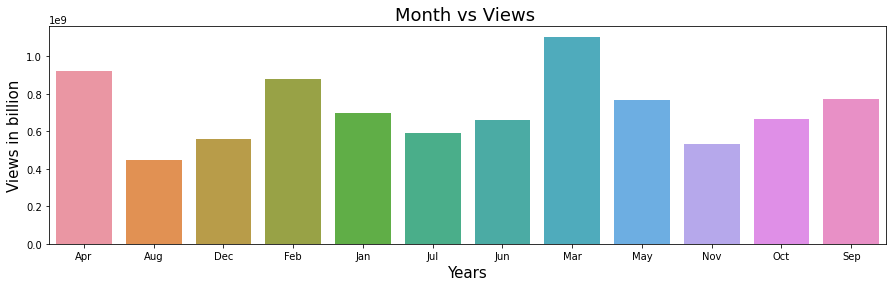

In [28]:
sns.barplot(x = 'published_month', y ='views', data= m_views)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Month vs Views ',fontsize = 18)

*  *From first graph on an average the number of talks released in the month of April, March followed by October are higher.*
*  *The number of talks released in August and December are comparitively lower than other months.*
*  *From second graph we can see that August, November and December months seems to have less views, While March and April months have most number of views.*

*****
**Let's check during which year most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Year vs No. of videos')

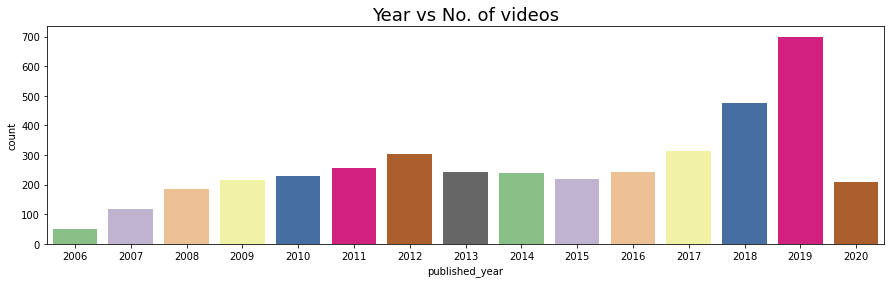

In [29]:
sns.countplot(data = tedtalk_df , x= 'published_year', palette ='Accent')
plt.title('Year vs No. of videos',fontsize = 18)

In [30]:
y_views = tedtalk_df.groupby('published_year')['views'].sum().reset_index()

Text(0.5, 1.0, 'Year vs Views ')

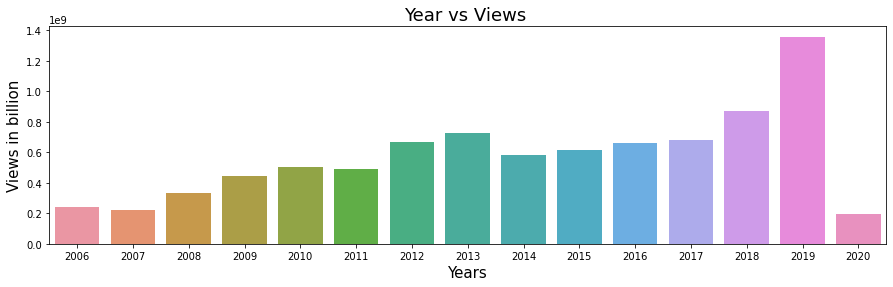

In [31]:
sns.barplot(x = 'published_year', y ='views', data= y_views)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Year vs Views ',fontsize = 18)

*  *From first bar graph the number of TED talks released in 2018 and 2019 higher followed by in 2012*
*  *From second bar graph we can get insight that the number of views are higher in 2013 and 2018 and less in 2006, 2007 and 2020.*

*****

*****
####**Now that we are done with the visualization of the colmns that we think are nessesary let's drop the unessesary columns and then we will feature columns we have:**

In [32]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_month',
       'published_day', 'published_year', 'dayofweek', 'dayofweek_num',
       'video_age_day', 'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

In [33]:
tedtalk_df.drop( columns = ['talk_id', 'title', 'speaker_1', 'recorded_date', 'published_date','about_speakers',
                                 'event', 'url','description','transcript','native_lang','related_talks', 'available_lang', 'topics', 'all_speakers', 'occupations'], inplace = True)

In [34]:
tedtalk_df.columns

Index(['views', 'comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

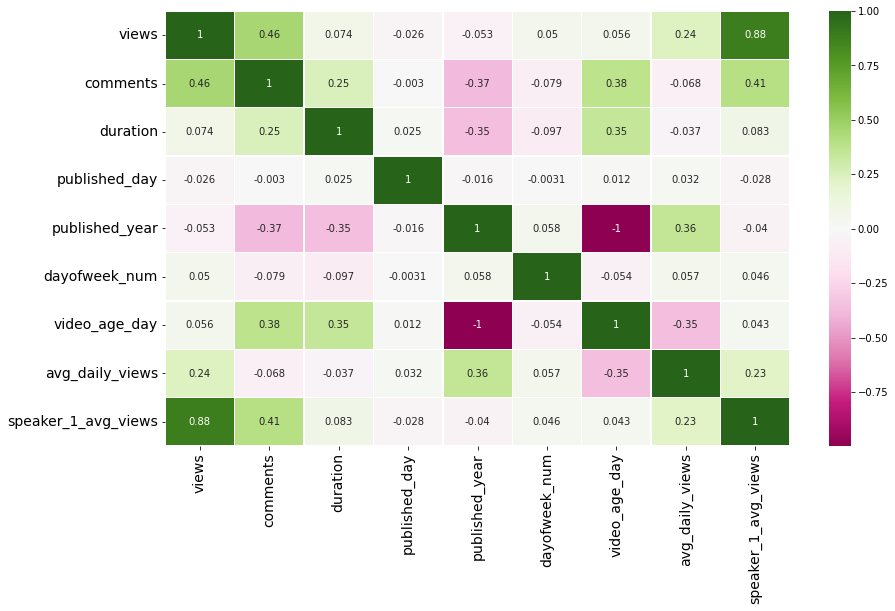

In [35]:
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(tedtalk_df.corr(), annot=True, linewidth=.5,cmap="PiYG");

**There is not much collineraity between the features, let's use get_dummies first and then we will try to check using VIF**

**Now we will apply get_dummies on the categorical columns of this Dataset:**

In [36]:
y = tedtalk_df['views']
X = tedtalk_df.drop(columns='views')

In [37]:
X = pd.get_dummies(X, drop_first= True)
print(X.shape)
X.sample(5)


(4000, 25)


,comments,duration,published_day,published_year,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,published_month_Aug,published_month_Dec,...,published_month_May,published_month_Nov,published_month_Oct,published_month_Sep,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
159,31.0,1164,27,2007,2,4539,197.114122,1000635.0,0,0,...,0,1,0,0,0,0,0,0,1,0
3541,83.0,441,25,2019,2,311,6267.054662,1949054.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2886,46.0,319,24,2018,2,647,3390.615147,2193728.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1779,98.0,837,30,2014,2,2040,1976.310784,4031674.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1774,73.0,951,23,2014,2,2047,824.180752,1687098.0,0,0,...,0,0,0,1,0,0,0,0,1,0


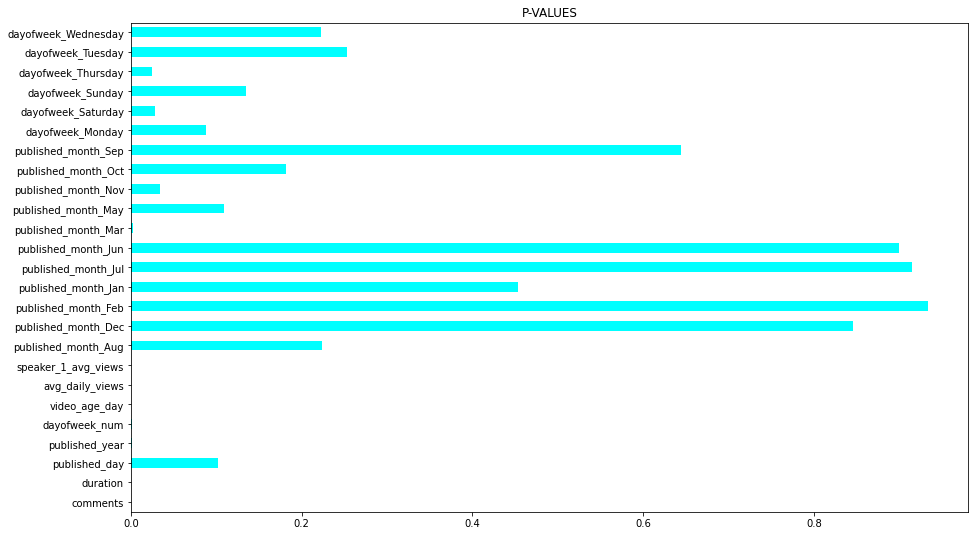

In [40]:
f_scores = f_regression(X, y)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='barh',color='aqua',figsize=(15,9))
plt.title('P-VALUES')
plt.show()


In [41]:
selected_features = np.where(p_values<0.005)[0]
X=X.iloc[0:,selected_features]

In [42]:
#fuction to calculate VIF in a Dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)

In [43]:
vif_calc(X)

,variables,VIF
0,comments,1.868723
1,duration,5.912193
2,published_year,11.205721
3,dayofweek_num,5.352987
4,video_age_day,4.071483
5,avg_daily_views,1.455682
6,speaker_1_avg_views,1.956692
7,published_month_Mar,1.134951


**All the VIF values are below 10 so we are good to Go!**

# **MODEL IMPLEMENTATION:**

A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feeature.
Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* GradientBoostingRegressor
* XGB Regression

In [44]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=23)

### **LINEAR REGRESSION:**

In [45]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 522689.1243570046
Test Data MAE : 506405.4334184177
Train Data MSE : 2463842512227.098
Test Data MSE : 2163468428405.0457
Train Data RMSE: 1569663.184325573
Test Data RMSE: 1470873.3556649415
Train R2 : 0.8041584410077776
Test R2 : 0.7664901002416991
Adjusted R2 :  0.7641284324818174


### **LASSO REGULARIZATION:**

In [46]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,20000]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [-50, -10, -1, 1, 10, 50, 100, 200, 500, 1000,
                                   10000, 20000, 22000]},
             scoring='neg_mean_squared_error')

In [47]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 20000}

Using  {'alpha': 20000}  the negative mean squared error is:  -2654208503101.322


In [48]:
#Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)

Train Data MAE : 522689.1243570046
Test Data MAE : 506405.4334184177
Train Data MSE : 2463842512227.098
Test Data MSE : 2163468428405.0457
Train Data RMSE: 1569663.184325573
Test Data RMSE: 1470873.3556649415
R2 : 0.8041584410077776
R2 : 0.7664901002416991
Adjusted R2 :  0.7641284324818174


### **RIDGE REGULARIZATION:**

In [55]:
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,6000,7000]}
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 6000, 7000]})

In [57]:
print(R_R.best_params_)

{'alpha': 6000}


In [58]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)

Train Data MAE : 515852.54282087914
Test Data MAE : 499356.474983037
Train Data MSE : 2466462366736.739
Test Data MSE : 2156941641745.913
Train Data RMSE: 1570497.4902038968
Test Data RMSE: 1468653.0024978374
R2 : 0.8039501986428721
R2 : 0.7671945566962087
Adjusted R2 :  0.7648400136539454


### **ELASTIC NET REGULARIZATION:**

In [60]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 110, 120, 150],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [61]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5, 'l1_ratio': 0.7}

Using  {'alpha': 5, 'l1_ratio': 0.7}  the negative mean squared error is:  -2653149037525.5757


In [62]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 516181.8685399282
Test Data MAE : 499828.96384988935
Train Data MSE : 2466137178496.758
Test Data MSE : 2157314836159.0144
Train Data RMSE: 1570393.9564633959
Test Data RMSE: 1468780.050299913
R2 : 0.8039760466309508
R2 : 0.7671542766584465
Adjusted R2 :  0.7647993262327418
